# 合并中文与英文文本处理和熵
本 Notebook 同时处理中文和英文文本，对文本进行预处理、统计频率、计算香农熵，并绘制长尾分布图。代码分为两部分：
1. **中文部分**：代码部分仅展示读取本地简缩版中文语料库（目录 `wiki_zh_simple`）和停用词文件（`cn_stopwords.txt`）得到的效果（因为完整版数据量过大，仅在报告中展示结果），代码使用 jieba 进行分词，统计字符（汉字）和词的频率，计算熵值并绘图。
2. **英文部分**：利用 NLTK 的 Gutenberg 语料库中的 `shakespeare-hamlet.txt`，对文本进行预处理、字母和单词频率统计，计算熵值并绘制图形。
### methodology
本文代码算法参考 Brown 等人的文章 *An Estimate of an Upper Bound for the Entropy of English* 中讨论的熵相关概念，并使用了 n-gram 模型来估计英文熵的上界。

In [2]:
import os
import math
import re
import unicodedata
from collections import Counter

import jieba
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import gutenberg

# 配置 matplotlib，使其支持中文显示（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 如果首次使用英文部分，请取消下行注释下载 Gutenberg 语料库
# nltk.download('gutenberg')

## 中文文本处理部分

In [5]:
def load_stopwords(filepath):
    """读取停用词，每行一个，去除空白字符"""
    with open(filepath, 'r', encoding='utf-8') as f:
        return {line.strip() for line in f if line.strip()}
def traverse_corpus(folder):
    """递归遍历目录下的所有文件，并返回文件内容"""
    for root, _, files in os.walk(folder):
        for name in files:
            path = os.path.join(root, name)
            try:
                with open(path, 'r', encoding='utf-8', errors='ignore') as f:
                    yield f.read()
            except Exception as e:
                print(f"无法读取 {path}: {e}")
def clean_text_for_char(text):
    """针对字符统计清洗文本，去除换行、空格、斜杠、引号、英文字母、标点、数字和等号"""
    text = re.sub(r'[\n\r\t]', '', text)           # 去除换行、回车、制表符
    text = re.sub(r'[ \u3000]', '', text)              # 去除普通和全角空格
    text = re.sub(r'[\/"“”]', '', text)               # 去除斜杠和引号
    text = re.sub(r'[A-Za-z]', '', text)                # 去除所有英文字母
    text = ''.join(ch for ch in text if not unicodedata.category(ch).startswith('P'))  # 去除标点
    text = re.sub(r'[0-9]', '', text).replace('=', '')  # 去除数字和等号
    return text
def simple_clean_for_seg(text):
    """仅去除换行、回车、制表符，为分词保留其他信息"""
    return re.sub(r'[\n\r\t]', '', text)
def filter_stopwords_words(words, stopwords):
    """过滤分词结果：去除空词、非中文词、全为标点的词以及停用词"""
    filtered = []
    for w in words:
        w = w.strip()
        if not w:
            continue
        if not any('\u4e00' <= ch <= '\u9fff' for ch in w):
            continue
        if all(unicodedata.category(ch).startswith('P') for ch in w):
            continue
        if w in stopwords:
            continue
        filtered.append(w)
def filter_stopwords_chars(text, stopwords):
    """将停用词中的所有字符去除"""
    stop_chars = set(''.join(stopwords))
    return ''.join(ch for ch in text if ch not in 
def plot_long_tail(counter, title="频率长尾分布"):
    """绘制长尾分布图（对数坐标）"""
    freqs = sorted(counter.values(), reverse=True)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(freqs)+1), freqs, marker='o')
    plt.yscale('log')
    plt.title(title)
    plt.xlabel('排名')
    plt.ylabel('频次 (对数刻度)')
    plt.show()
def plot_top50(counter, title="前50高频统计"):
    """绘制出现频率前50的直方图"""
    top50 = counter.most_common(50)
    labels, counts = zip(*top50)
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(labels)), counts, tick_label=labels)
    plt.title(title)
    plt.xlabel('词/字符')
    plt.ylabel('频次')
    plt.xticks(rotation=45)
    plt.show()

Building prefix dict from the default dictionary ...


处理中文文件 1 ，长度: 380362 字符


Loading model from cache C:\Users\Dell\AppData\Local\Temp\jieba.cache
Loading model cost 0.597 seconds.
Prefix dict has been built successfully.


处理中文文件 2 ，长度: 375598 字符
处理中文文件 3 ，长度: 360369 字符
处理中文文件 4 ，长度: 377895 字符
处理中文文件 5 ，长度: 376338 字符
处理中文文件 6 ，长度: 394081 字符
处理中文文件 7 ，长度: 392995 字符
处理中文文件 8 ，长度: 395854 字符
处理中文文件 9 ，长度: 403955 字符
处理中文文件 10 ，长度: 388394 字符
处理中文文件 11 ，长度: 401499 字符
处理中文文件 12 ，长度: 396120 字符
处理中文文件 13 ，长度: 412250 字符
处理中文文件 14 ，长度: 140 字符
处理中文文件 15 ，长度: 453945 字符
处理中文文件 16 ，长度: 454441 字符
处理中文文件 17 ，长度: 425127 字符
处理中文文件 18 ，长度: 439430 字符
处理中文文件 19 ，长度: 449651 字符
处理中文文件 20 ，长度: 448277 字符
处理中文文件 21 ，长度: 430094 字符
处理中文文件 22 ，长度: 443174 字符
处理中文文件 23 ，长度: 461679 字符
处理中文文件 24 ，长度: 458043 字符
处理中文文件 25 ，长度: 455757 字符
处理中文文件 26 ，长度: 442378 字符
处理中文文件 27 ，长度: 445186 字符
处理中文文件 28 ，长度: 441151 字符
处理中文文件 29 ，长度: 436885 字符
处理中文文件 30 ，长度: 456043 字符
处理中文文件 31 ，长度: 426900 字符
处理中文文件 32 ，长度: 433800 字符
处理中文文件 33 ，长度: 459629 字符
处理中文文件 34 ，长度: 425652 字符
处理中文文件 35 ，长度: 443339 字符
处理中文文件 36 ，长度: 468213 字符
中文字符信息熵：10.0433 bits/char
中文词信息熵：14.2386 bits/word


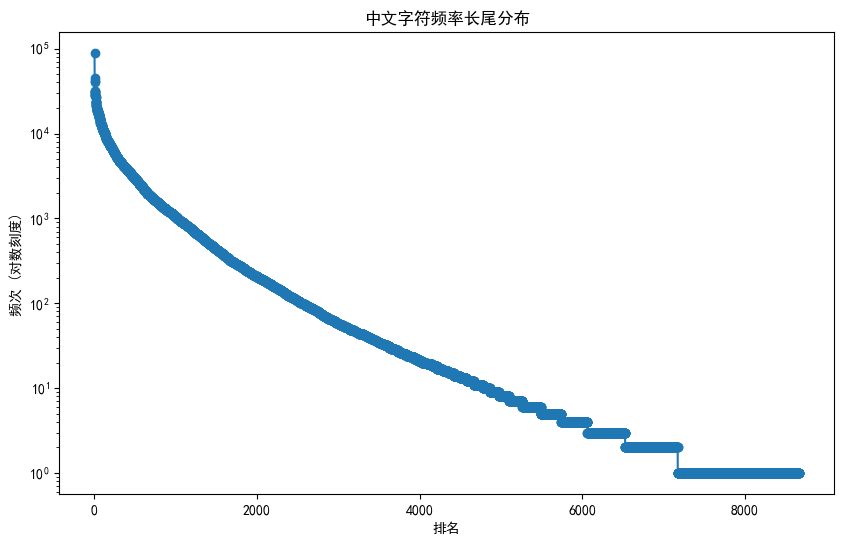

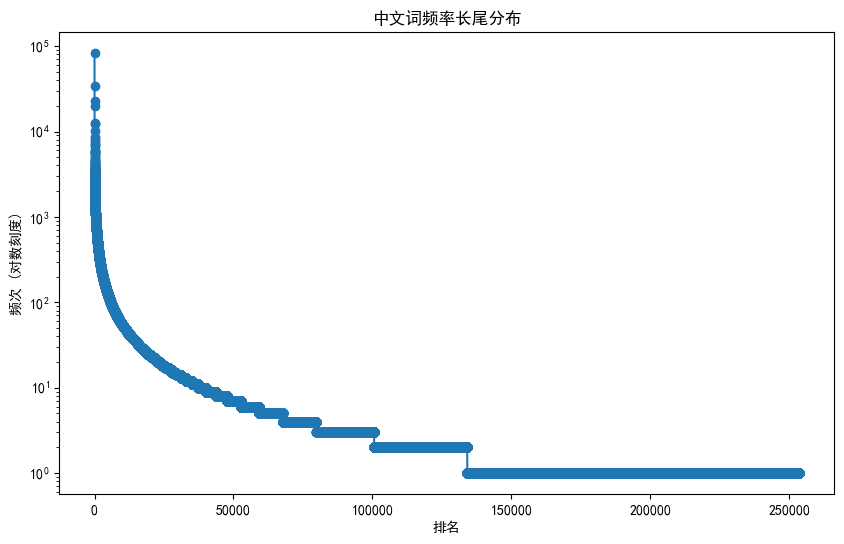

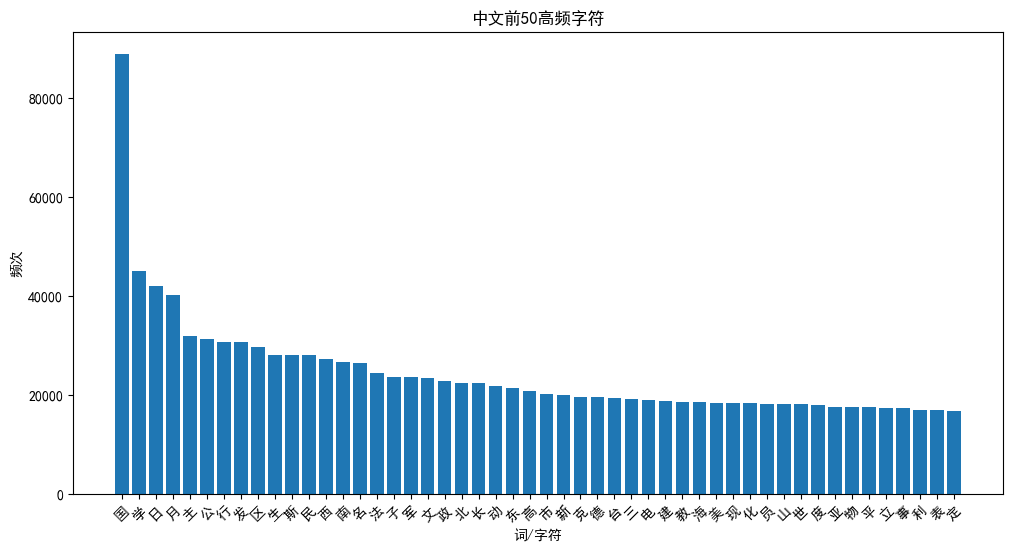

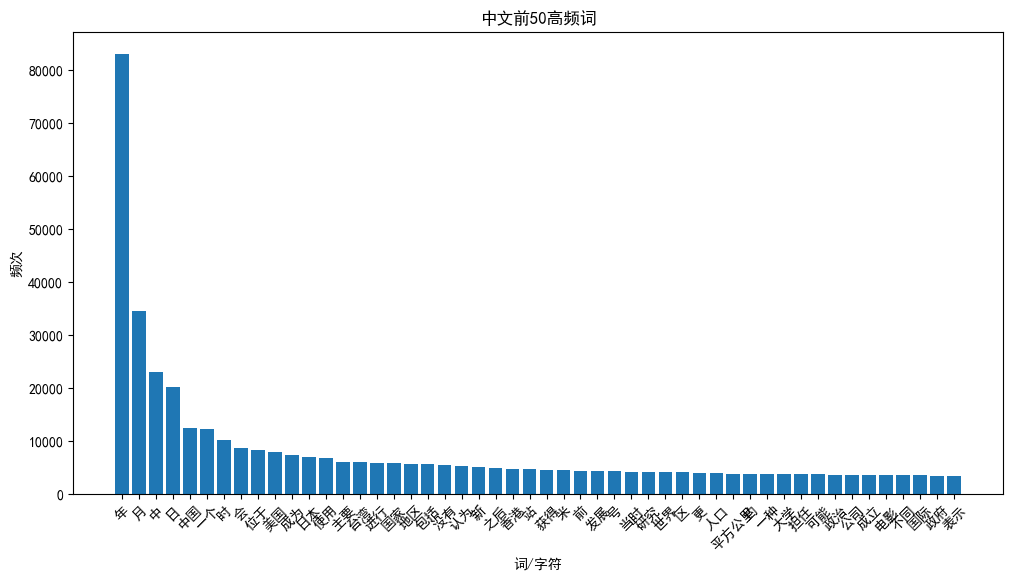

In [7]:
# === 中文文本处理 ===

CORPUS_DIR = 'D:\D\wiki_zh_simple'             # 中文语料库目录
STOPWORDS_FILE = 'cn_stopwords.txt'  # 停用词文件

stopwords_cn = load_stopwords(STOPWORDS_FILE)

char_counter_cn = Counter()
word_counter_cn = Counter()
total_chars_cn = 0
total_words_cn = 0

file_index = 0
for document in traverse_corpus(CORPUS_DIR):
    file_index += 1
    print(f"处理中文文件 {file_index} ，长度: {len(document)} 字符")
    
    # 针对字符：先清洗，再过滤停用词中的字符
    cleaned = clean_text_for_char(document)
    filtered_chars = filter_stopwords_chars(cleaned, stopwords_cn)
    char_counter_cn.update(filtered_chars)
    total_chars_cn += len(filtered_chars)
    
    # 针对词：轻度清洗后分词，并过滤停用词及非中文词
    seg_text = simple_clean_for_seg(document)
    tokens = jieba.lcut(seg_text)
    valid_tokens = filter_stopwords_words(tokens, stopwords_cn)
    word_counter_cn.update(valid_tokens)
    total_words_cn += len(valid_tokens)

if total_chars_cn > 0:
    entropy_chars_cn = -sum((cnt/total_chars_cn)*math.log2(cnt/total_chars_cn) for cnt in char_counter_cn.values())
else:
    entropy_chars_cn = 0.0

if total_words_cn > 0:
    entropy_words_cn = -sum((cnt/total_words_cn)*math.log2(cnt/total_words_cn) for cnt in word_counter_cn.values())
else:
    entropy_words_cn = 0.0

print(f"中文字符信息熵：{entropy_chars_cn:.4f} bits/char")
print(f"中文词信息熵：{entropy_words_cn:.4f} bits/word")

# 绘制中文长尾分布图
plot_long_tail(char_counter_cn, title="中文字符频率长尾分布")
plot_long_tail(word_counter_cn, title="中文词频率长尾分布")

plot_top50(char_counter_cn, title="中文前50高频字符")
plot_top50(word_counter_cn, title="中文前50高频词")

## 英文文本处理部分

Gutenberg 语料库中的文本文件:
austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt
英文字母信息熵：4.1426 bits
英文单词信息熵：9.3621 bits


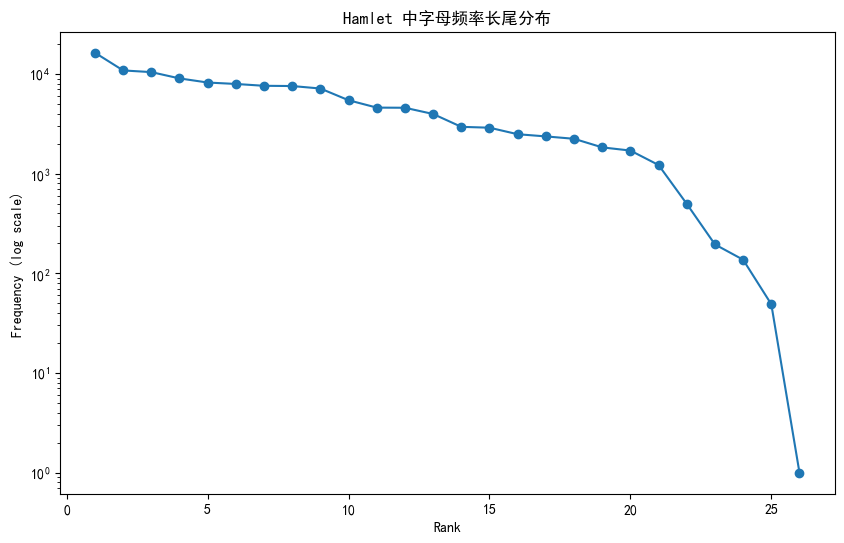

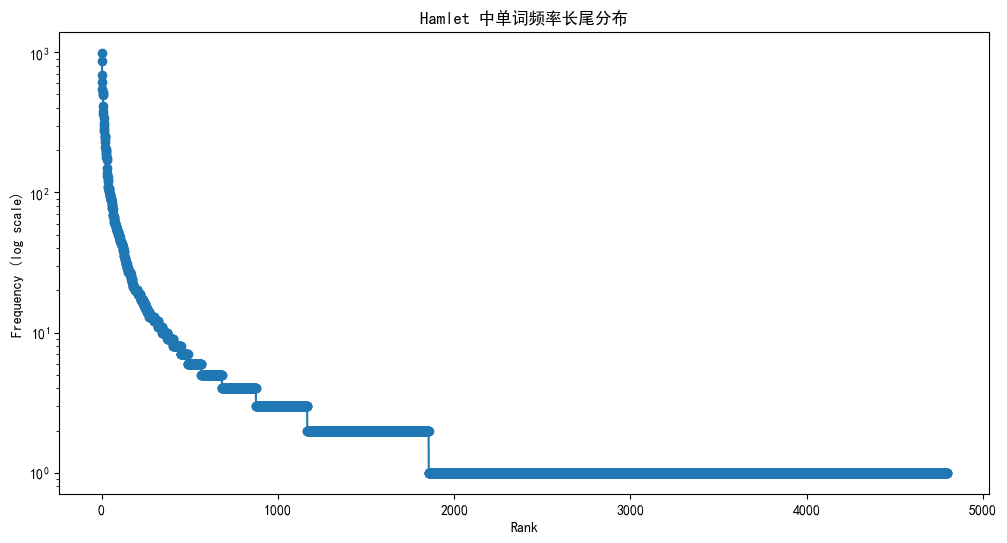

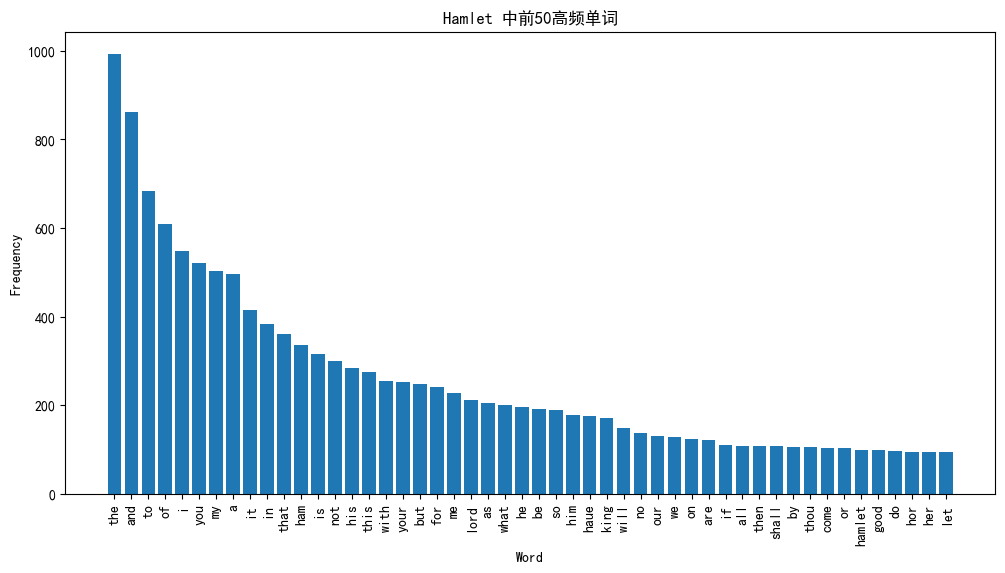

In [9]:
# 列出 Gutenberg 语料库中的文本文件
print("Gutenberg 语料库中的文本文件:")
for fid in gutenberg.fileids():
    print(fid)

# 选择英文文本：莎士比亚的 Hamlet
raw_english = gutenberg.raw('shakespeare-hamlet.txt')

# 文本预处理：只保留字母和空格
english_clean = re.sub(r'[^A-Za-z\s]', '', raw_english)

# 处理字母：转小写并统计频率
letter_list_en = [ch.lower() for ch in english_clean if ch.isalpha()]
letter_counter_en = Counter(letter_list_en)

# 分词：按空白分割，并统计词频
word_list_en = english_clean.lower().split()
word_counter_en = Counter(word_list_en)

def compute_entropy(counter_obj, total):
    """计算给定频率分布的香农熵"""
    ent = 0.0
    for cnt in counter_obj.values():
        p = cnt/total
        ent -= p * math.log2(p)
    return ent

total_letters_en = sum(letter_counter_en.values())
total_words_en = sum(word_counter_en.values())

entropy_letters_en = compute_entropy(letter_counter_en, total_letters_en)
entropy_words_en = compute_entropy(word_counter_en, total_words_en)

print(f"英文字母信息熵：{entropy_letters_en:.4f} bits")
print(f"英文单词信息熵：{entropy_words_en:.4f} bits")

# 绘制英文字母频率长尾分布图（对数坐标）
sorted_letters_en = sorted(letter_counter_en.values(), reverse=True)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_letters_en)+1), sorted_letters_en, marker='o')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency (log scale)')
plt.title('Hamlet 中字母频率长尾分布')
plt.show()

# 绘制英文单词频率长尾分布图
sorted_words_en = sorted(word_counter_en.values(), reverse=True)
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(sorted_words_en)+1), sorted_words_en, marker='o')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency (log scale)')
plt.title('Hamlet 中单词频率长尾分布')
plt.show()

# 绘制英文中出现频率最高的50个单词的直方图
top50_en = word_counter_en.most_common(50)
labels_en, counts_en = zip(*top50_en)
plt.figure(figsize=(12, 6))
plt.bar(labels_en, counts_en)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Hamlet 中前50高频单词')
plt.show()